<a href="https://colab.research.google.com/github/hermmanhender/curso-control-optimo-UTNFRLR/blob/main/P%C3%A9ndulo_Estable_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.00
0.00
3.14
0.00


0
0
0
0


     [,1]       [,2]   [,3] [,4]
[1,]    0  1.0000000   0.00    0
[2,]    0 -0.2000000  -1.96    0
[3,]    0  0.0000000   0.00    1
[4,]    0 -0.3333333 -19.60    0


0.000000
2.000000
0.000000
3.333333


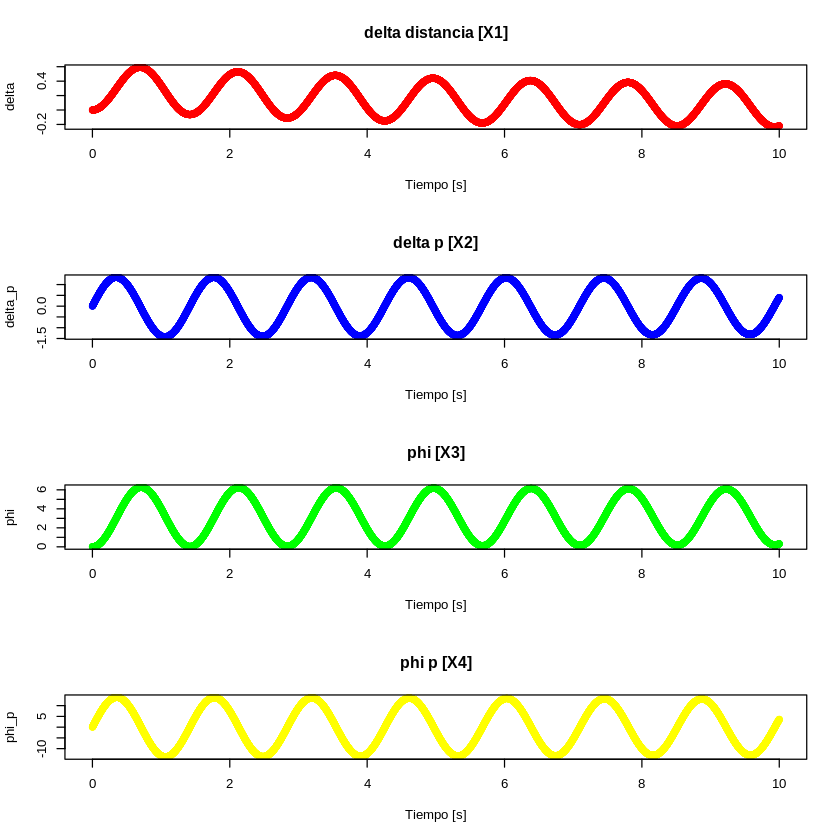

In [ ]:
#Se modifico la matriz A y B 
#faltaria u X acc y ver la parte de las variables agregadas

#https://colab.research.google.com/?authuser=1#create=true&language=r
#La linea superior crea el Notebook, el authuser=1 indica el usuario del Chrome, en mi caso, 0 es gmail y 1 es UNC.edu.ar
#R.version.string
#print(installed.packages())
#https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r
#https://www.datacamp.com/community/tutorials/functions-in-r-a-tutorial
#$ cd "C:\Users\LIMAC\Usr_Julian\HDMIO\Enebro\Usr_Julian\FCEFyN UNC\Extension\2022 01\M1" #No son necesarios en Colab
#$ R #No son necesarios en Colab
#rm(list=ls(all=TRUE)) #es BORRAR todo #No son necesarios en Colab
#clear;%close all;
#X=[0; 0];
X <- numeric(4)
dim(X) <- c(4,1)
ii=0;t_etapa=1e-3
tF=1e1;
Ts=t_etapa;
At=Ts;
Kmax=(tF/At); #fix() No es necesario en Colab
########################################
pi=3.14;
X0<-c(0,0,pi,0)
dim(X0) <- c(4,1)
X0
X1<-c(0,0,0,0)
dim(X1) <- c(4,1)
X1
########################################
#  delta     = x1
#  delta_p   = x2
#  phi       = x3
#  phi_p     = x4
########################################

#t=linspace(0,T,Kmax);
#R=2.2e3;L=10e-6;C=10e-9;vin=12;
########################################
m=.1;F=0.1; long=0.6;g=9.8;M=.5;dlt_t=0.0001;
########################################
#e=zeros(round(tF/t_etapa),1);
#e <- numeric(tF/t_etapa)
#dim(e) <- c(tF/t_etapa,1)
#TL=1.15e-4;
#u=12;
TL=5.; #tiempo de simulacion
u=0;


#% x1(1)=X(1);% delta
x1 <- numeric(tF/t_etapa)
dim(x1) <- c(tF/t_etapa,1)

x2 <- numeric(tF/t_etapa) #delta_p
dim(x2) <- c(tF/t_etapa,1)
##################################################################
x3 <- numeric(tF/t_etapa)#phi
dim(x3) <- c(tF/t_etapa,1)

x4 <- numeric(tF/t_etapa)#phi_p
dim(x4) <- c(tF/t_etapa,1)
##################################################################
acc <- numeric(tF/t_etapa)
dim(acc) <- c(tF/t_etapa,1)

###################################################################
A<-c(0,1,0,0,0,-(F/M),-((g*m)/(M)),0,0,0,0,1,0,-((F)/(M*long)),-(g*(M+m))/(M*long),0)
dim(A) <- c(4,4) #print(A)
A<-t(A)
print(A)
B<-c(0,1/M,0,(1/(M*long)))
dim(B) <- c(4,1)#genero matriz 4x1 filaXcolumna
B
##################################################################
##
for(i in 0:(tF/At)) {
    ii=ii+1
    x1[ii]<-X[1] # X1 delta
    x2[ii]<-X[2] # X2 delta_p
    x3[ii]<-X[3] # X3 phi 
    x4[ii]<-X[4] # X4 phi_p
#   X=modrlc(t_etapa, X, u);
#y %*% z A %*% X+B %*% u
    xp=A%*% (X-X0)+B%*% u;
    X=X+xp*At;
    acc[ii]<-u;
    # Y si agregás éste cálculo, podrás ver si se corresponde con el No Lineal
    # p_pp=(1/(M+m))*(u(i)-m*long*tita_pp*cos(alfa(i))+m*long*omega(i)^2*sin(alfa(i))-Fricc*p_p(i));
    # tita_pp=(1/long)*(g*sin(alfa(i))-p_pp*cos(alfa(i)));
    # p_p(i+1)=p_p(i)+h*p_pp;
    # p(i+1)=p(i)+h*p_p(i);
    # omega(i+1)=omega(i)+h*tita_pp;
    # alfa(i+1)=alfa(i)+h*omega(i);
#end
}

t1<-seq(0,tF,At)  #seq(from, to, by= )
#para imprimir la imágen, sino es muy grande el archivo
#Acá hay que volver a asignar el directorio donde se almacena la imagen
#png(file="C:/Users/LIMAC/Usr_Julian/HDMIO/Enebro/Usr_Julian/FCEFyN UNC/Extension/2021 01/Imag_R_plot.png", width=1920, height=1080)
par(mfrow=c(4,1))
plot(t1,x1,     main="delta distancia [X1]", col = "red", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(t1,x2,     main="delta p [X2]", col = "blue", lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(t1,x3,     main="phi [X3]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(t1,x4,     main="phi p [X4]", col = "yellow", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")


#print(t1)
#print(x1)
#dev.off() #Acá termina de imprimir